In [1]:
import torch
import torchaudio
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
keys = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"

def text_encode(text):
    return [keys.index(i) for i in text.lower() if i in keys]

print(text_encode("Hi my name is Luke"))

[19, 20, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 23, 32, 22, 16]


In [3]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH
processor = bundle.get_text_processor()
tacotron = bundle.get_tacotron2().to(device="cpu")


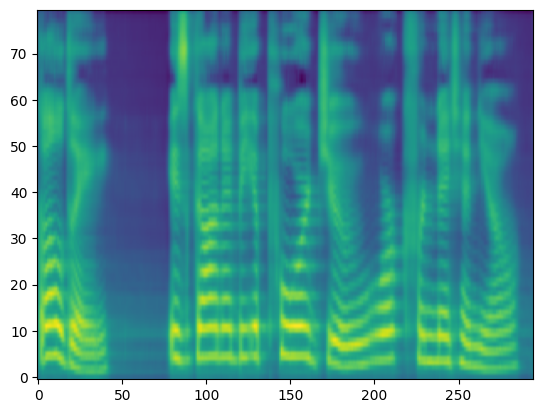

In [ ]:
text = "Hello"
def plot_spec(sentence):
    with torch.inference_mode():
        processed, lengths = processor(sentence)
        spec,_,_ = tacotron.infer(processed,lengths)
    _ = plt.imshow(spec[0].cpu().detach(),origin="lower", aspect="auto")

plot_spec(text)

In [5]:
vocoder = bundle.get_vocoder().to(device="cpu")

In [6]:
with torch.inference_mode():
    processed, lengths = processor(text)
    spec,spec_lengths,_ = tacotron.infer(processed,lengths)
    waveform,lengths = vocoder(spec,spec_lengths)

In [7]:
import IPython

In [8]:
def plot(waveform, spec, sample_rate):
    waveforms = waveform.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2,1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)

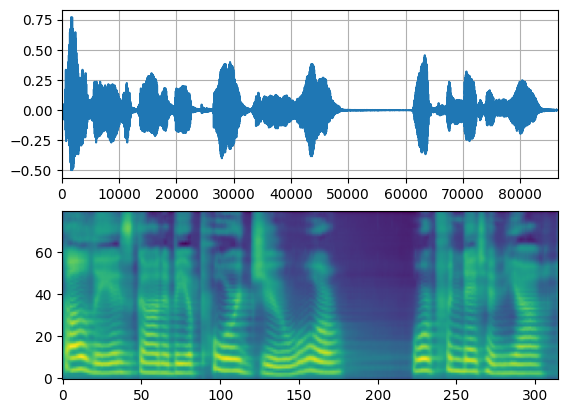

In [9]:
plot(waveform,spec,vocoder.sample_rate)